#Aproximación Area Funcional Local de Pilar


## Descarga de Datos SUBE


```
# Tiene formato de código
```



In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [ ]:


#Descarga Datos SUBE x Viajes
viajes_SUBE_2024 = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/viajes-etapas-transporte-publico/viajes_BAdata_20241016.csv"

In [ ]:
#Leer en geopandas
total_sube = gpd.read_file(viajes_SUBE_2024, encoding = 'utf-8')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
total_sube.head()

,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,943975,1,1,13,0,0,1,-58.36355406986585,-34.81459161854865,-58.392320586109605,-34.70605891683584,06028,06434,1.2992383025027203,f,F,
1,1373260,1,2,9,0,0,2,-58.349294386161716,-34.820470095147144,-58.25419609195273,-34.719667680103974,06028,06658,1.4063956299313254,f,F,75
2,2417307,1,2,12,0,0,2,-58.34404715242745,-34.80905315335317,-58.267137426296095,-34.7778197133538,06028,06274,1.378436149673623,f,M,30
3,3098944,1,1,19,0,0,1,-58.328989637182396,-34.764934235956225,-58.376999224148115,-34.78741524574875,06028,06028,1.5354609929078014,f,F,25
4,1704921,1,2,12,0,1,1,-58.387878451315565,-34.82417016060671,-58.27991051202327,-34.70958387127902,06028,06658,1.7953622165763112,f,M,20


In [ ]:
#Funcion para cambiar tipo
def cambiar_col_tipo(df, column, type):
    df[column] = df[column].replace('', np.nan)
    df[column] = df[column].astype(type)



In [ ]:
#Valores a enteros

for column in ['rango_horario', 'id_tarjeta', 'id_viaje', 'cantidad_etapas', 'etapas_subte', 'etapas_tren', 'etapas_colectivo', 'grupo_edad']:
    try:
      cambiar_col_tipo(total_sube, column, 'int')
    except:
      total_sube[column] = total_sube[column].replace(np.nan, 0).replace('', 0)
      cambiar_col_tipo(total_sube, column, 'int')

# Valores a flotante
for column in ['longitud_origen_viaje', 'latitud_origen_viaje', 'longitud_destino_viaje', 'latitud_destino_viaje', 'factor_expansion_viaje']:
    cambiar_col_tipo(total_sube, column, 'float')

In [ ]:
total_sube.dtypes

,0
id_tarjeta,int64
id_viaje,int64
cantidad_etapas,int64
rango_horario,int64
etapas_subte,int64
etapas_tren,int64
etapas_colectivo,int64
longitud_origen_viaje,float64
latitud_origen_viaje,float64
longitud_destino_viaje,float64


In [ ]:
total_sube.head()


,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,943975,1,1,13,0,0,1,-58.363554,-34.814592,-58.392321,-34.706059,06028,06434,1.299238,f,F,0
1,1373260,1,2,9,0,0,2,-58.349294,-34.820470,-58.254196,-34.719668,06028,06658,1.406396,f,F,75
2,2417307,1,2,12,0,0,2,-58.344047,-34.809053,-58.267137,-34.777820,06028,06274,1.378436,f,M,30
3,3098944,1,1,19,0,0,1,-58.328990,-34.764934,-58.376999,-34.787415,06028,06028,1.535461,f,F,25
4,1704921,1,2,12,0,1,1,-58.387878,-34.824170,-58.279911,-34.709584,06028,06658,1.795362,f,M,20


In [ ]:
#Filtro viajes laborales
# 20 <=  Edad < 65
# 5 <= hora viajes <= 10
viajes_lab_tot = total_sube.loc[(total_sube['grupo_edad'] > 15) & (total_sube['grupo_edad'] < 65) & (total_sube['rango_horario'] >= 5) & (total_sube['rango_horario'] <= 10)]

In [ ]:
viajes_lab_tot

,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
13,2095774,1,2,6,0,0,2,-58.345596,-34.785271,-58.374086,-34.591996,06028,02001,1.645992,f,M,45
17,2688483,1,3,8,0,1,2,-58.335346,-34.773893,-58.395291,-34.865839,06028,06028,1.285113,f,F,55
19,520543,1,1,7,0,0,1,-58.392764,-34.843769,-58.388292,-34.860186,06028,06028,1.290092,f,F,35
23,2570988,1,1,9,0,0,1,-58.336723,-34.805029,-58.349294,-34.820470,06028,06028,1.337308,f,M,60
25,386463,1,1,6,0,0,1,-58.331413,-34.778031,-58.341321,-34.689308,06028,06035,2.063401,f,M,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891718,2001157,3,2,9,0,0,2,-59.022525,-34.103821,-58.960882,-34.184847,06882,06126,2.437853,f,M,30
6891728,2369115,3,1,8,0,0,1,-59.028102,-34.097475,NaN,NaN,06882,,NaN,t,M,60
6891772,512398,3,1,10,0,0,1,-59.192028,-34.042793,-59.202682,-34.072108,06882,06882,1.945312,f,F,40
6892207,2300179,4,1,10,0,0,1,-59.025735,-34.096817,-59.023162,-34.100489,06882,06882,3.000000,f,F,35


In [ ]:
#Cargar geometria de puntos de origen
viajes_lab_tot = gpd.GeoDataFrame(viajes_lab_tot, geometry=gpd.points_from_xy(viajes_lab_tot.longitud_origen_viaje, viajes_lab_tot.latitud_origen_viaje, crs = 4326))


<Axes: >

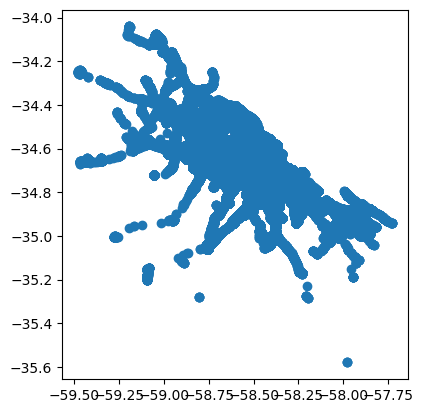

In [ ]:
viajes_lab_tot.plot()

In [ ]:
viajes_pilar = viajes_lab_tot.loc[viajes_lab_tot['departamento_destino_viaje'] == '06638']

23764
1620495


<Axes: >

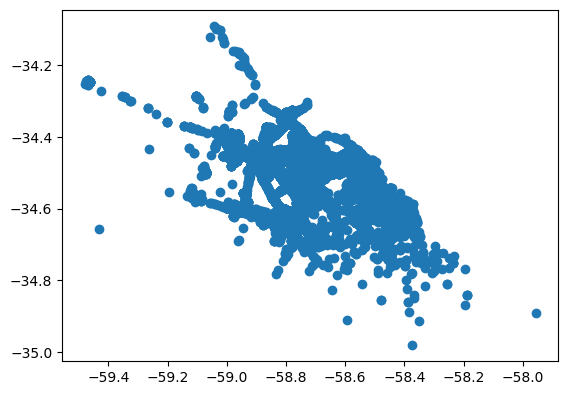

In [ ]:
print(len(viajes_pilar))
print(len(viajes_lab_tot))
viajes_pilar.plot()

In [ ]:
viajes_pilar.to_file('viajes_pilar.gpkg', layer = 'viajes pilar', driver='GPKG')
viajes_lab_tot.to_file('viajes_lab_tot.gpkg', layer = 'viajes laborales', driver='GPKG')

##Clasificacion de Unidades territoriales

In [9]:
#Cargar gdf localidades
url_loc = "https://github.com/C-Holguin/PILAR_AEL/raw/main/localidades_pilar.gpkg"

localidades_ael = gpd.read_file(url_loc, encoding = 'utf-8', layer = 'localidades_pilar')
localidades_ael.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: unable to open database file: this file is a WAL-enabled database. It cannot be opened because it is presumably read-only or in a read-only directory. Retrying with IMMUTABLE=YES open option
  return ogr_read(


,link,nam,gna,viajes_total,viajes_pilar,pilar_porc,geometry
0,06126020,Barrio Los Pioneros (Barrio Tavella),Localidad,1.441825,0.000000,0.000000,"MULTIPOLYGON (((-58.95613 -34.24919, -58.95591..."
1,06126000,Zona rural,Zona rural,440.093020,3.674828,0.835012,"MULTIPOLYGON (((-58.92687 -34.31221, -58.92723..."
2,06266150,Las Vizcachas,Localidad,0.000000,0.000000,0.000000,"MULTIPOLYGON (((-59.01547 -34.29555, -59.0158 ..."
3,06252000,Zona rural,Zona rural,68.551499,3.650085,5.324588,"MULTIPOLYGON (((-58.85642 -34.26194, -58.8559 ..."
4,0625201001,Belén de Escobar,Entidad,7549.097165,685.593651,9.081797,"MULTIPOLYGON (((-58.8298 -34.27496, -58.82927 ..."


<Axes: >

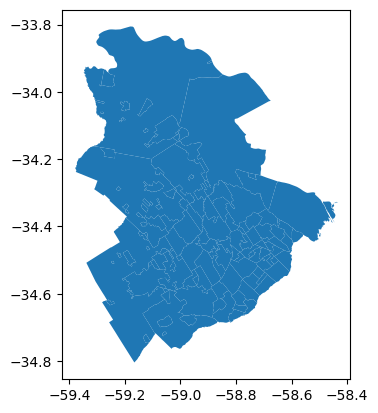

In [15]:
localidades_ael.plot()

In [10]:
#Cargar gdf municipios
url_mun = "https://github.com/C-Holguin/PILAR_AEL/raw/main/municipios_pilar.gpkg"

municipios_ael = gpd.read_file(url_mun, encoding = 'utf-8', layer = 'municipios_pilar')
municipios_ael.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: unable to open database file: this file is a WAL-enabled database. It cannot be opened because it is presumably read-only or in a read-only directory. Retrying with IMMUTABLE=YES open option
  return ogr_read(


,IN1,NAM,GNA,viajes_total,viajes_pilar,pilar_porc,geometry
0,06035,Avellaneda,Partido,53453.531499,14.296628,0.026746,"MULTIPOLYGON Z (((-58.33838 -34.63358 0, -58.3..."
1,06728,San Andrés de Giles,Partido,139.979063,18.659276,13.330048,"MULTIPOLYGON Z (((-59.36073 -34.24338 0, -59.3..."
2,06861,Vicente López,Partido,33216.427575,184.900304,0.556653,"MULTIPOLYGON Z (((-58.47929 -34.4944 0, -58.47..."
3,06252,Escobar,Partido,22869.577212,2451.043466,10.717485,"MULTIPOLYGON Z (((-58.71215 -34.2489 0, -58.69..."
4,06756,San Isidro,Partido,33317.069864,253.125513,0.759747,"MULTIPOLYGON Z (((-58.51416 -34.44353 0, -58.5..."


<Axes: >

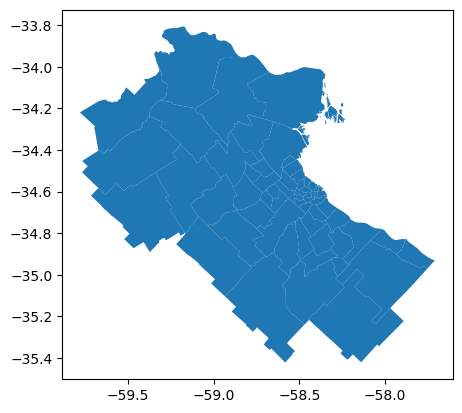

In [14]:
municipios_ael.plot()

In [11]:
#Cargar gdf municipios
url_frac = "https://github.com/C-Holguin/PILAR_AEL/raw/main/fracciones_pilar.gpkg"

fracciones_ael = gpd.read_file(url_frac, encoding = 'utf-8', layer = 'fracciones_pilar')
fracciones_ael.head()

/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:198: RuntimeWarning: unable to open database file: this file is a WAL-enabled database. It cannot be opened because it is presumably read-only or in a read-only directory. Retrying with IMMUTABLE=YES open option
  return ogr_read(


,cod_indec,viajes_total,viajes_pilar,pilar_porc,geometry
0,0203503,662.554609,0.0,0.0,"MULTIPOLYGON (((-58.41507 -34.6084, -58.41544 ..."
1,0203505,782.028995,0.0,0.0,"MULTIPOLYGON (((-58.4271 -34.60257, -58.42835 ..."
2,0203506,2730.622045,0.0,0.0,"MULTIPOLYGON (((-58.43067 -34.60595, -58.43153..."
3,0204203,636.044021,0.0,0.0,"MULTIPOLYGON (((-58.45026 -34.61124, -58.45161..."
4,0204204,595.580983,0.0,0.0,"MULTIPOLYGON (((-58.44684 -34.61598, -58.4477 ..."


<Axes: >

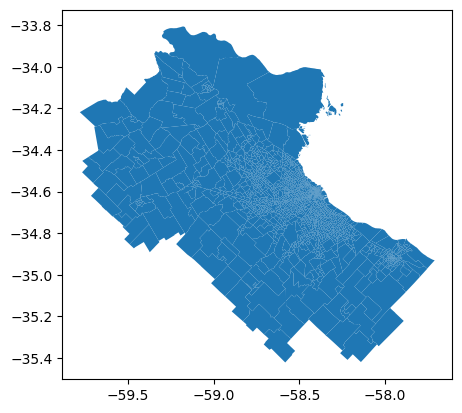

In [13]:
fracciones_ael.plot()